# Python Group Project -3 (Group Code: G2B4)
- Web Development using Flask

## Domain
- Finance & Banking

## Context:

- Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customers first apply for a home loan after that company manually validates the customer eligibility for loan.

- Company wants to automate the loan eligibility process based on customer detail provided while filling the details online. They need a web application where a user can access their website and register, login, and enter the required details such as Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others for checking the eligibility for the home loan.

## Project Objective:

1) This is a standard supervised classification task. A classification problem where we have to predict whether a customer is eligible for loan or not based on a given set of independent variable(s).
2) To build a Python Flask ML application where a user has to get registered by entering the username and password and login to the website and then enter their details to check whether they are eligible for loan or not.

# Steps to the project: [Total score: 15 points]

## Model Building and saving the model using Pickle

### 1. Import required libraries and read the dataset. (2)

In [49]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer

In [50]:
# Reading the csv file 

df = pd.read_csv('loan_approval_data.csv')
df.head(3)


,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y


### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features. (2)

In [51]:
# Checking first few samples

df.sample(5)


,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
544,lp002757,female,yes,0.0,not graduate,no,3017,663.0,102.0,360.0,NaN,semiurban,y
134,lp001487,male,no,0.0,graduate,no,4895,0.0,102.0,360.0,1.0,semiurban,y
248,lp001824,male,yes,1.0,graduate,no,2882,1843.0,123.0,480.0,1.0,semiurban,y
369,lp002191,male,yes,0.0,graduate,no,19730,5266.0,570.0,360.0,1.0,rural,n
296,lp001953,male,yes,1.0,graduate,no,6875,0.0,200.0,360.0,1.0,semiurban,y


In [52]:
# Checking shape of the dataset

df.shape

(614, 13)

In [53]:
# Checking the dataset info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    float64
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


### 3. Check for missing values in the dataset, if present? handle them with appropriate methods and drop redundant features. (2)

In [54]:
# Checking for duplicated records

len(df[df.duplicated()])


0

#### Inferences:
- From the above result, we can observe that there are no duplicate records found. Hence no record is dropped from the dataset

In [55]:
# dropping redundant columns like loan_id

df = df.drop(['loan_id'], axis=1)
df.head(5)

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [56]:
# Checking the the missing values in all the columns

df.isna().sum()

gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

In [57]:
# imputing na values in 'gender' column
mode_gender = df['gender'].mode()[0]
df['gender'].fillna( mode_gender, inplace=True )

df['gender'].isna().sum()

0

In [58]:
# imputing na values in 'married' column
mode_married = df['married'].mode()[0]
df['married'].fillna( mode_married, inplace=True )

df['married'].isna().sum()

0

In [59]:
# imputing na values in 'dependents' column
mean_dependents = df['dependents'].mean()
df['dependents'].fillna( mean_dependents, inplace=True )

df['dependents'].isna().sum()

0

In [60]:
# imputing na values in 'self_employed' column
mode_self_employed = df['self_employed'].mode()[0]
df['self_employed'].fillna( mode_self_employed, inplace=True )

df['self_employed'].isna().sum()

0

In [63]:
# imputing na values in 'loanamount' column
median_loanamount = df['loanamount'].median()
df['loanamount'].fillna( median_loanamount, inplace=True )

df['loanamount'].isna().sum()

0

In [61]:
# imputing na values in 'loan_amount_term' column
mean_loan_amount_term = df['loan_amount_term'].mean()
df['loan_amount_term'].fillna( mean_loan_amount_term, inplace=True )

df['loan_amount_term'].isna().sum()

0

In [64]:
# imputing na values in 'credit_history' column
mode_credit_history = df['credit_history'].mode()[0]
df['credit_history'].fillna( mode_credit_history, inplace=True )

df['credit_history'].isna().sum()

0

In [65]:
df.isna().sum()

gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

- All columns filled with non-null values after successful imputation

#### Inferences:
-    Total count of missing entries in each column is observed
-    All null or NaN values are imputed as: 
        - mode for categorical columns
        - median for numerical columns
-    Finally, all column information is retrieved and it is verified that there are no null values in the dataset

## 4. Visualize the distribution of the target column 'loan_status' with respect to various categorical features and write your observations. (2)

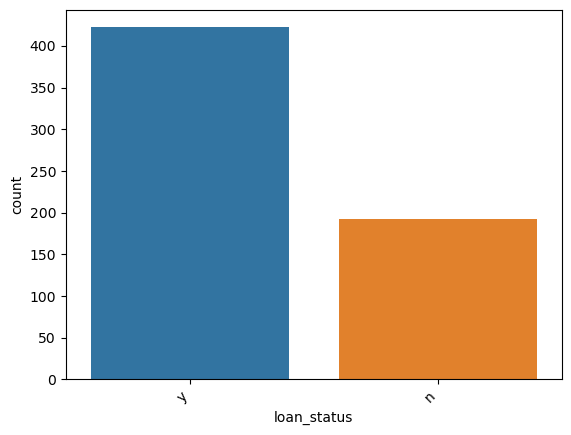

In [17]:

sns.countplot(x='loan_status', data=df)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


<Axes: ylabel='proportion'>

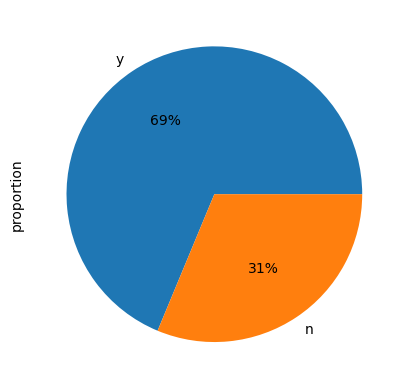

In [18]:
## plotting the distribution of column 'rented for' with percentage values in pie-chart

df['loan_status'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%')

#### Inferences:

- The above plots show the distribution of Rented-for categories over the dataset
- It is observed that customers rent outfits mostly for 'weddings' followed by 'formal affair' and least for 'vacation'


## 5. Encode the categorical data. (2)

In [66]:
# keeping copy of df before encoding
dfc = df.copy()
dfc.head()


,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,male,no,0.0,graduate,no,5849,0.0,128.0,360.0,1.0,urban,y
1,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [81]:
dfc['credit_history'].value_counts()

credit_history
1.0    525
0.0     89
Name: count, dtype: int64

In [67]:
df['gender'] = df['gender'].replace({'male':0,'female':1})

In [68]:
df['married'] = df['married'].replace({'yes':0,'no':1})

In [69]:
df['education'] = df['education'].replace({'graduate':0,'not graduate':1})

In [70]:
df['self_employed'] = df['self_employed'].replace({'no':0,'yes':1})

In [71]:
df['property_area'] = df['property_area'].replace({'semiurban':0,'urban':1, 'rural':2})

In [72]:
df.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,0,1,0.0,0,0,5849,0.0,128.0,360.0,1.0,1,y
1,0,0,1.0,0,0,4583,1508.0,128.0,360.0,1.0,2,n
2,0,0,0.0,0,1,3000,0.0,66.0,360.0,1.0,1,y
3,0,0,0.0,1,0,2583,2358.0,120.0,360.0,1.0,1,y
4,0,1,0.0,0,0,6000,0.0,141.0,360.0,1.0,1,y


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             614 non-null    int64  
 1   married            614 non-null    int64  
 2   dependents         614 non-null    float64
 3   education          614 non-null    int64  
 4   self_employed      614 non-null    int64  
 5   applicantincome    614 non-null    int64  
 6   coapplicantincome  614 non-null    float64
 7   loanamount         614 non-null    float64
 8   loan_amount_term   614 non-null    float64
 9   credit_history     614 non-null    float64
 10  property_area      614 non-null    int64  
 11  loan_status        614 non-null    object 
dtypes: float64(5), int64(6), object(1)
memory usage: 57.7+ KB


## 6. Separate the target and independent features and split the data into train and test. (2)

In [74]:
X = df.drop(columns=['loan_status'],axis=1)
y= df['loan_status']


In [75]:
X.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area
0,0,1,0.0,0,0,5849,0.0,128.0,360.0,1.0,1
1,0,0,1.0,0,0,4583,1508.0,128.0,360.0,1.0,2
2,0,0,0.0,0,1,3000,0.0,66.0,360.0,1.0,1
3,0,0,0.0,1,0,2583,2358.0,120.0,360.0,1.0,1
4,0,1,0.0,0,0,6000,0.0,141.0,360.0,1.0,1


In [76]:
y.head()

0    y
1    n
2    y
3    y
4    y
Name: loan_status, dtype: object

In [77]:
## Split the data in to train and test 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(429, 11) (185, 11)
(429,) (185,)


## 7. Build any classification model to predict the loan status of the customer and save your model using pickle. (3)

In [78]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [79]:
## Accuracy check 

y_train_pred = rf.predict(X_train) 
y_test_pred = rf.predict(X_test)


accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print('Accuracy Train -> ', accuracy_train)
print("Accuracy Test -> ", accuracy_test)

Accuracy Train ->  1.0
Accuracy Test ->  0.7837837837837838


In [80]:
# Generate pickle file

import pickle 
pickle.dump(rf,open('model.pkl','wb'))

#### Inferences:
- All categorical columns are encoded and now converted to numerical type using the LabelEncoder technique